In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
patients=pd.read_csv('s41598-020-73558-3_sepsis_survival_study_cohort.csv')

In [3]:
patients.head() # checking some top rows in the dataset

age_years  sex_0male_1female  episode_number  hospital_outcome_1alive_0dead
0          7                  1               1                              1
1         17                  0               2                              1
2         70                  0               1                              1
3         76                  0               1                              1
4          8                  0               1                              1

In [4]:
patients.info() # this tells about the number of instances in every column, their data types and presence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19051 entries, 0 to 19050
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      19051 non-null  int64
 1   sex_0male_1female              19051 non-null  int64
 2   episode_number                 19051 non-null  int64
 3   hospital_outcome_1alive_0dead  19051 non-null  int64
dtypes: int64(4)
memory usage: 595.5 KB


In [5]:
patients.describe() # this tells about some standard statistical measures like mean, min, max, quartiles for values in every column

age_years  sex_0male_1female  episode_number  \
count  19051.000000       19051.000000    19051.000000   
mean      72.503228           0.448585        1.396252   
std       18.614470           0.497363        0.783749   
min        0.000000           0.000000        1.000000   
25%       65.000000           0.000000        1.000000   
50%       77.000000           0.000000        1.000000   
75%       85.000000           1.000000        2.000000   
max      100.000000           1.000000        5.000000   

       hospital_outcome_1alive_0dead  
count                   19051.000000  
mean                        0.810719  
std                         0.391742  
min                         0.000000  
25%                         1.000000  
50%                         1.000000  
75%                         1.000000  
max                         1.000000

In [6]:
sum(patients['age_years']==0) # number of patients having zero age. Code inside the sum() gives a series of boolean values. When summned, the true values add up as 1, giving the number of cases where the comparison of age_years=0 is True

63

In [7]:
patients.drop(['hospital_outcome_1alive_0dead'],axis=1).corr() # checking for correlation between the predictor variables used

age_years  sex_0male_1female  episode_number
age_years           1.000000           0.063937       -0.068292
sex_0male_1female   0.063937           1.000000       -0.039642
episode_number     -0.068292          -0.039642        1.000000

<Axes: xlabel='hospital_outcome_1alive_0dead', ylabel='Count'>

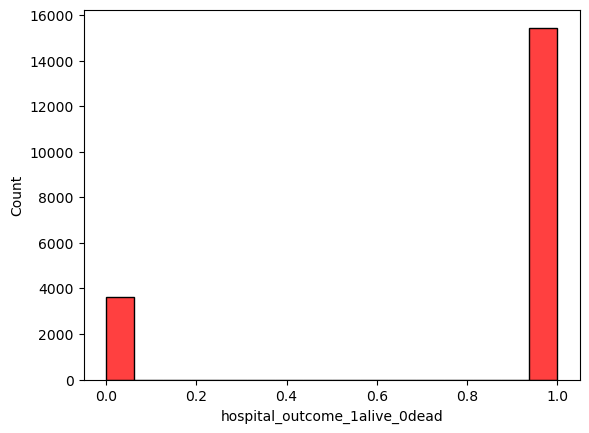

In [8]:
sns.histplot(patients['hospital_outcome_1alive_0dead'],color='red')

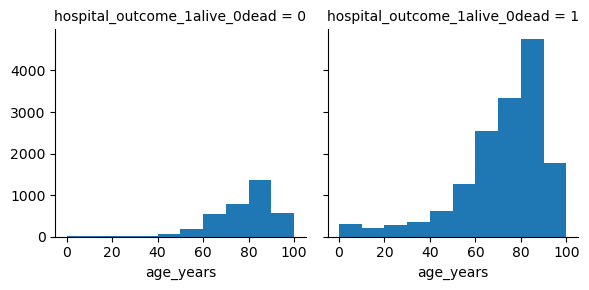

In [9]:
g=sns.FacetGrid(data=patients,col='hospital_outcome_1alive_0dead') # this makes an underlying plot which divides the upcoming plot space based on values specified in col
g.map(plt.hist,'age_years') # g.map allows the plot created to be divided into the segments created by FacetGrid in above line of code

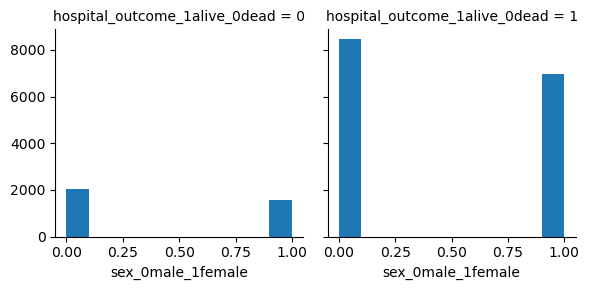

In [10]:
g=sns.FacetGrid(data=patients,col='hospital_outcome_1alive_0dead')
g.map(plt.hist,'sex_0male_1female') # same is done for sex column

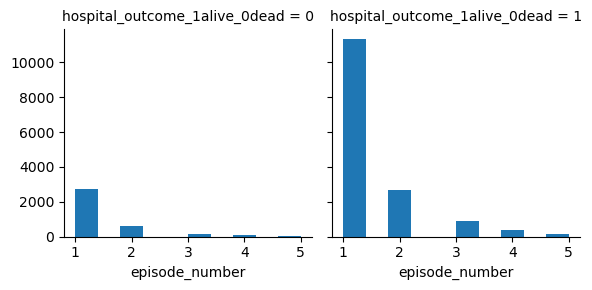

In [11]:
g=sns.FacetGrid(data=patients,col='hospital_outcome_1alive_0dead')
g.map(plt.hist,'episode_number') # same is done for episode_number column

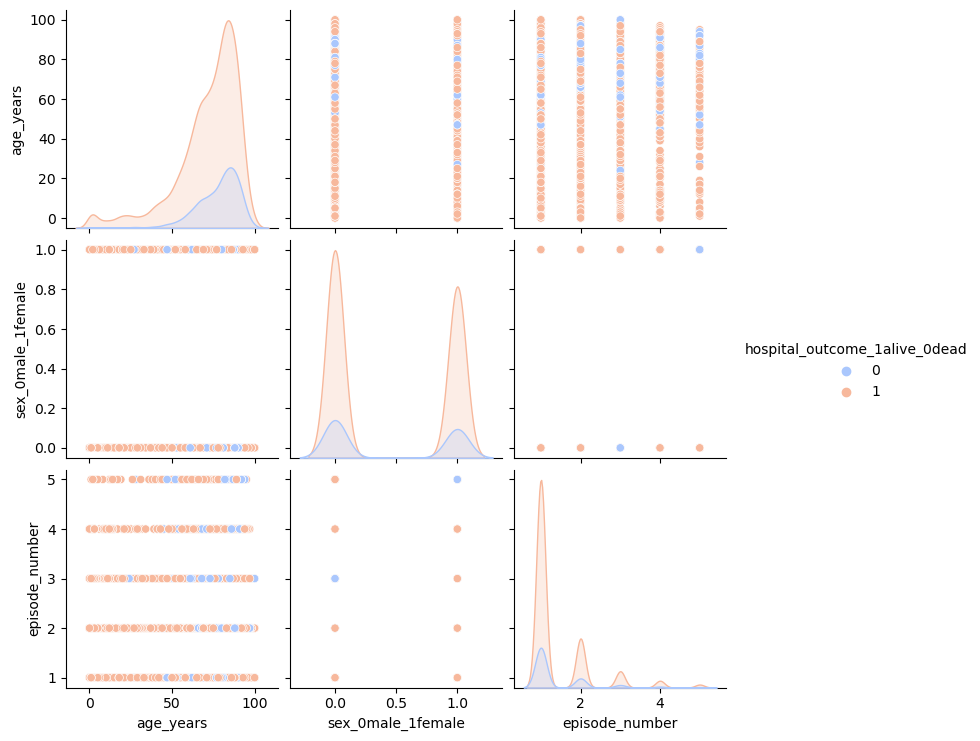

In [12]:
sns.pairplot(data=patients,hue='hospital_outcome_1alive_0dead',palette='coolwarm') 

In [13]:
from sklearn.linear_model import LogisticRegression  # for data modelling using Logistic Regression
from sklearn.model_selection import cross_val_score,StratifiedKFold
# StratifiedKFold ensures that class distribution is maintained during the random data splits. This is especially useful in case of imbalanced datasets
# In every split of test and train data, observations in both contain all the available class labels as per the proportion of class labels in original dataset, which is divided into test and train 

In [14]:
X=patients[['age_years','sex_0male_1female','episode_number']].values # getting the values of predictor variables
y=patients['hospital_outcome_1alive_0dead'].values # getting the values of outcome variable
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=1) # defining the cross validation method as 5-fold Cross Validation

In [15]:
# importing the required functions
from imblearn.over_sampling import RandomOverSampler  # random over sampling
from imblearn.over_sampling import SMOTE # Synthetic Minority Oversampling
from imblearn.over_sampling import BorderlineSMOTE # Borderline SMOTE
from imblearn.pipeline import Pipeline # this is defined for Cross Validation

In [16]:
steps1=[('over',RandomOverSampler(sampling_strategy='minority',random_state=1)),('model',LogisticRegression())] # defining Pipeline for LogisticRegression Model
# sampling strategy = 'minority' makes the minority class to be oversampled till it's number become equal to majority class
# random_state is set to 1 for reproducability of this code, just like setting a random seed
pipeline1=Pipeline(steps=steps1) # steps contain RandomOverSampler as we are doing Random Over Sampling
score1=np.mean(cross_val_score(pipeline1,X,y,scoring='roc_auc',cv=cv,n_jobs=-1)) # taking mean of roc_auc obtained in each fold to get overall score
print(score1)

0.5896025099172861


In [17]:
# same process is followed with SMOTE
steps2 = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline2 = Pipeline(steps=steps2)
score2 = np.mean(cross_val_score(pipeline2, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score2)

0.589870323916139


In [18]:
# same process with Borderline SMOTE
steps3 = [('over', BorderlineSMOTE()), ('model', LogisticRegression())]
pipeline3=Pipeline(steps=steps3)
score3 = np.mean(cross_val_score(pipeline3, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score3)

0.5904857769893186


In [19]:
from sklearn.ensemble import RandomForestClassifier # importing RandomForestClassifier model

In [20]:
# same process is repeated again for Random Forest Classifier
steps4 = [('over', RandomOverSampler(sampling_strategy='minority')), ('model', RandomForestClassifier())] # now model is changed to RandomForestClassifier
pipeline4 = Pipeline(steps=steps4) # Random Over Sampling
score4 = np.mean(cross_val_score(pipeline4, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score4)

0.5585710031154677


In [21]:
steps5 = [('over', SMOTE()), ('model', RandomForestClassifier())]
pipeline5 = Pipeline(steps=steps5) # SMOTE Over Sampling
score5 = np.mean(cross_val_score(pipeline5, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score5)

0.5572899166232061


In [22]:
steps6 = [('over', BorderlineSMOTE()), ('model', RandomForestClassifier())]
pipeline6 = Pipeline(steps=steps6) # Borderline SMOTE
score6 = np.mean(cross_val_score(pipeline6, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score6)

0.5532946899413286


In [23]:
from sklearn.naive_bayes import MultinomialNB # Naive Bayes Classifier

In [24]:
steps7 = [('over', RandomOverSampler()), ('model', MultinomialNB())]
pipeline7 = Pipeline(steps=steps7) # Random OverSampling
score7 = np.mean(cross_val_score(pipeline7, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score7)

0.562822733025785


In [25]:
steps8 = [('over', SMOTE()), ('model', MultinomialNB())]
pipeline8 = Pipeline(steps=steps8) # SMOTE
score8 = np.mean(cross_val_score(pipeline8, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score8)

0.5629645098473142


In [26]:
steps9 = [('over', BorderlineSMOTE()), ('model', MultinomialNB())]
pipeline9 = Pipeline(steps=steps9) # Borderline SMOTE
score9 = np.mean(cross_val_score(pipeline9, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score9)

0.562407119379827


In [35]:
from sklearn.svm import SVC # Support Vector Classifier

In [32]:
steps10 = [('over', RandomOverSampler()), ('model', SVC())]
pipeline10 = Pipeline(steps=steps10) # Random Over Sampling
score10 = np.mean(cross_val_score(pipeline10, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score10)

0.5872636255045066


In [33]:
steps11 = [('over', SMOTE()), ('model', SVC())]
pipeline11 = Pipeline(steps=steps11) # SMOTE
score11 = np.mean(cross_val_score(pipeline11, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score11)

0.5883968909568412


In [34]:
steps12 = [('over', BorderlineSMOTE()), ('model', SVC())]
pipeline12 = Pipeline(steps=steps12) # Borderline SMOTE
score12 = np.mean(cross_val_score(pipeline12, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))
print(score12)

0.5879721147155886


In [36]:
new_records=pd.read_csv('s41598-020-73558-3_sepsis_survival_validation_cohort.csv') # importing the validation dataset as new_records

In [37]:
new_records.head()

age_years  sex_0male_1female  episode_number  hospital_outcome_1alive_0dead
0         20                  0               1                              1
1         22                  0               1                              1
2         26                  1               2                              0
3         33                  1               1                              1
4         33                  0               1                              1

In [38]:
new_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      137 non-null    int64
 1   sex_0male_1female              137 non-null    int64
 2   episode_number                 137 non-null    int64
 3   hospital_outcome_1alive_0dead  137 non-null    int64
dtypes: int64(4)
memory usage: 4.4 KB


In [39]:
new_records.describe()

age_years  sex_0male_1female  episode_number  \
count  137.000000         137.000000      137.000000   
mean    59.540146           0.343066        1.160584   
std     15.748956           0.476475        0.368494   
min     20.000000           0.000000        1.000000   
25%     50.000000           0.000000        1.000000   
50%     60.000000           0.000000        1.000000   
75%     72.000000           1.000000        1.000000   
max     89.000000           1.000000        2.000000   

       hospital_outcome_1alive_0dead  
count                     137.000000  
mean                        0.824818  
std                         0.381518  
min                         0.000000  
25%                         1.000000  
50%                         1.000000  
75%                         1.000000  
max                         1.000000

<Axes: xlabel='hospital_outcome_1alive_0dead', ylabel='Count'>

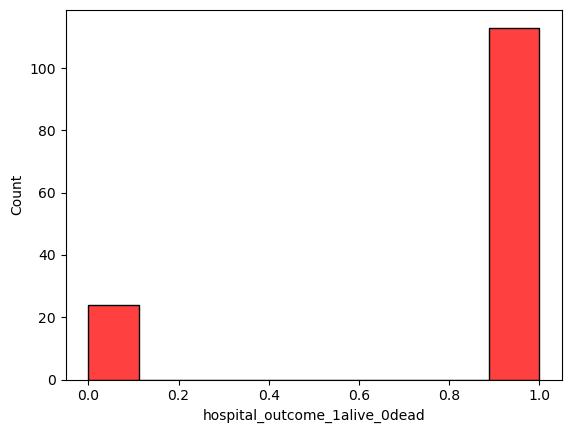

In [40]:
sns.histplot(new_records['hospital_outcome_1alive_0dead'],color='red')

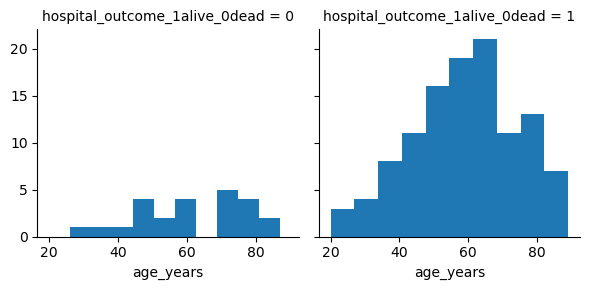

In [41]:
g=sns.FacetGrid(data=new_records,col='hospital_outcome_1alive_0dead')
g.map(plt.hist,'age_years')

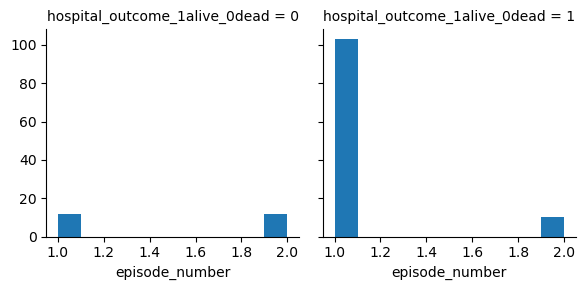

In [42]:
g=sns.FacetGrid(data=new_records,col='hospital_outcome_1alive_0dead')
g.map(plt.hist,'episode_number')

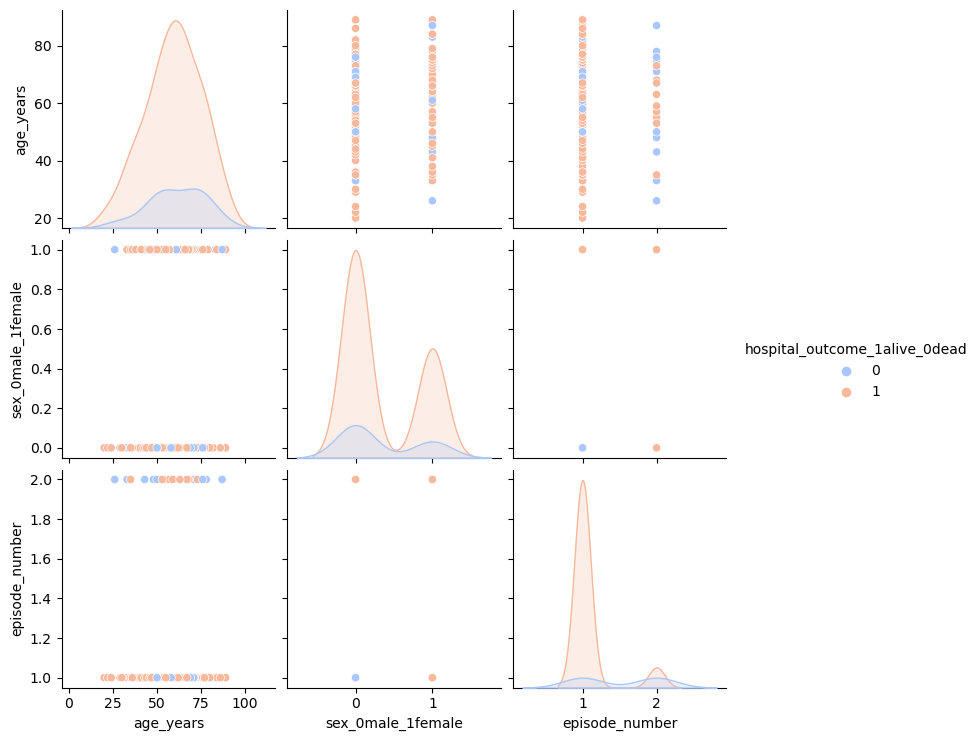

In [43]:
sns.pairplot(data=new_records,hue='hospital_outcome_1alive_0dead',palette='coolwarm')

In [44]:
from sklearn.metrics import confusion_matrix,classification_report # packages for performance metrics of models
from sklearn.model_selection import train_test_split # to split the data between training and testing dataset

In [45]:
Xnew=new_records[['age_years','sex_0male_1female','episode_number']].values # getting the predictor variables
ynew=new_records['hospital_outcome_1alive_0dead'].values # getting the outcome variable

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.2, random_state=1)
model1=LogisticRegression()
model1.fit(X,y)
predictions=model1.predict(Xnew)
print(classification_report(ynew,predictions))
print(confusion_matrix(ynew,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.82      1.00      0.90       113

    accuracy                           0.82       137
   macro avg       0.41      0.50      0.45       137
weighted avg       0.68      0.82      0.75       137

[[  0  24]
 [  0 113]]


C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# using BorderlineSMOTE to oversample the minority class in patients before it is used to train LogisticRegression Model
oversample=BorderlineSMOTE()
X1, y1 = oversample.fit_resample(X, y)

(array([15445.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15445.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

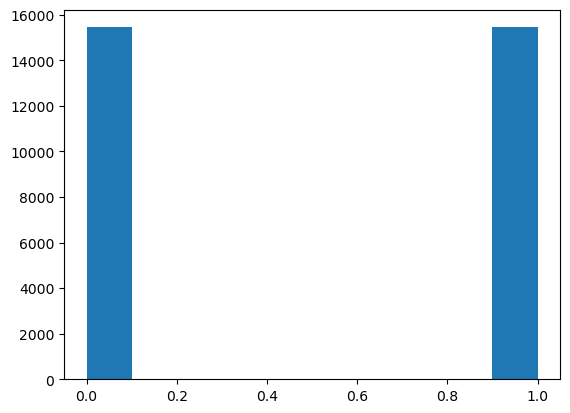

In [48]:
plt.hist(y1)

In [49]:
logmodel=LogisticRegression()
logmodel.fit(X1,y1)
predictions=logmodel.predict(Xnew)
print(classification_report(ynew,predictions))
print(confusion_matrix(ynew,predictions))

              precision    recall  f1-score   support

           0       0.25      0.29      0.27        24
           1       0.84      0.81      0.83       113

    accuracy                           0.72       137
   macro avg       0.55      0.55      0.55       137
weighted avg       0.74      0.72      0.73       137

[[ 7 17]
 [21 92]]


In [50]:
model2=RandomForestClassifier()
model2.fit(X,y)
predictions=model2.predict(Xnew)
print(classification_report(ynew,predictions))
print(confusion_matrix(ynew,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.82      1.00      0.90       113

    accuracy                           0.82       137
   macro avg       0.41      0.50      0.45       137
weighted avg       0.68      0.82      0.75       137

[[  0  24]
 [  0 113]]


C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
oversample=RandomOverSampler(sampling_strategy='minority')
X2, y2 = oversample.fit_resample(X, y)

(array([15445.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15445.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

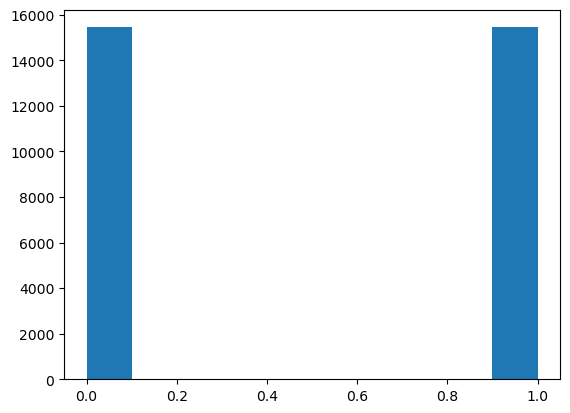

In [52]:
plt.hist(y2)

In [53]:
rfc=RandomForestClassifier()
rfc.fit(X2,y2)
predictions=rfc.predict(Xnew)
print(classification_report(ynew,predictions))
print(confusion_matrix(ynew,predictions))

              precision    recall  f1-score   support

           0       0.13      0.21      0.16        24
           1       0.81      0.70      0.75       113

    accuracy                           0.61       137
   macro avg       0.47      0.45      0.45       137
weighted avg       0.69      0.61      0.65       137

[[ 5 19]
 [34 79]]


In [54]:
model3=MultinomialNB()
model3.fit(X,y)
predictions=model3.predict(Xnew)
print(classification_report(ynew,predictions))
print(confusion_matrix(ynew,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.82      1.00      0.90       113

    accuracy                           0.82       137
   macro avg       0.41      0.50      0.45       137
weighted avg       0.68      0.82      0.75       137

[[  0  24]
 [  0 113]]


C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([15445.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15445.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

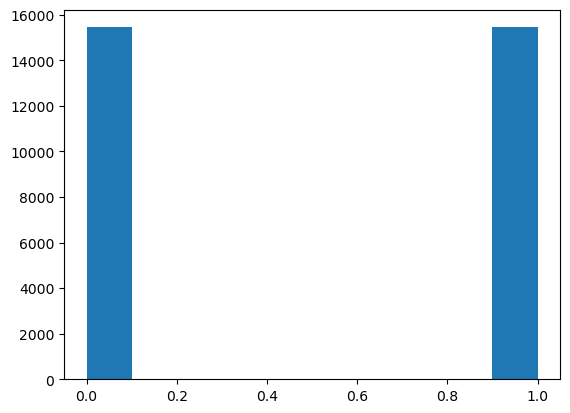

In [55]:
oversample=RandomOverSampler(sampling_strategy='minority')
X3, y3 = oversample.fit_resample(X, y)
plt.hist(y3)

In [56]:
gnb=MultinomialNB()
gnb.fit(X3,y3)
predictions=gnb.predict(Xnew)
print(classification_report(ynew,predictions))
print(confusion_matrix(ynew,predictions))

              precision    recall  f1-score   support

           0       0.13      0.38      0.20        24
           1       0.78      0.48      0.59       113

    accuracy                           0.46       137
   macro avg       0.46      0.43      0.39       137
weighted avg       0.67      0.46      0.52       137

[[ 9 15]
 [59 54]]


In [57]:
model4=SVC()
model4.fit(X,y)
predictions=model4.predict(Xnew)
print(classification_report(ynew,predictions))
print(confusion_matrix(ynew,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.82      1.00      0.90       113

    accuracy                           0.82       137
   macro avg       0.41      0.50      0.45       137
weighted avg       0.68      0.82      0.75       137

[[  0  24]
 [  0 113]]


C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajaykumar\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([15445.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15445.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

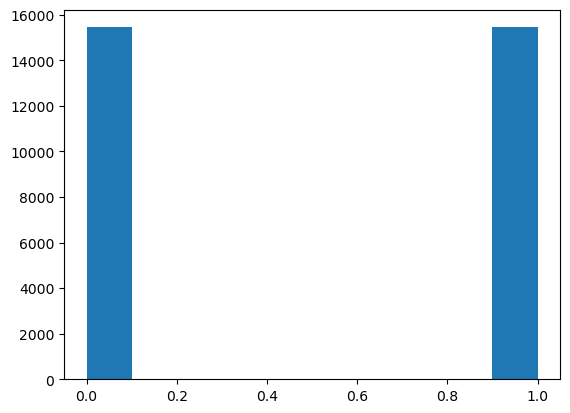

In [58]:
oversample=SMOTE()
X4, y4 = oversample.fit_resample(X, y)
plt.hist(y4)

In [59]:
svc=SVC()
svc.fit(X4,y4)
predictions=svc.predict(Xnew)
print(classification_report(ynew,predictions))
print(confusion_matrix(ynew,predictions))

              precision    recall  f1-score   support

           0       0.24      0.42      0.31        24
           1       0.85      0.73      0.78       113

    accuracy                           0.67       137
   macro avg       0.55      0.57      0.55       137
weighted avg       0.75      0.67      0.70       137

[[10 14]
 [31 82]]
